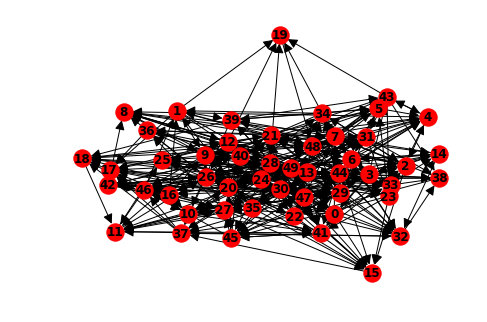

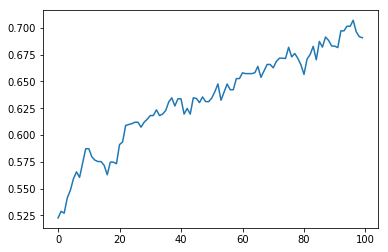

In [55]:
# https://www.quantamagazine.org/mathematics-shows-how-to-ensure-evolution-20180626/
# http://ped.fas.harvard.edu/files/ped/files/nature05_0.pdf
# put on Erdos-Renyi random directed graphs and see the behavior
# the fitness and weights are randomly assigned as well. Uniformly on [0,1] for both

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def averageFitness(currentGraph):
    allNodes=currentGraph.nodes(data=True)
    normalization=0.0
    count=0
    for n in allNodes:
        normalization=normalization+n[1]['fitness']
        count=count+1
    return normalization/(count+0.0)

def selectIndividualByFitness(currentGraph):
    allNodes=currentGraph.nodes(data=True)
    normalization=0.0
    for n in allNodes:
        normalization=normalization+n[1]['fitness']
    randGenerated=np.random.ranf()
    probUpToNow=0.0
    for n in allNodes:
        probUpToNow=probUpToNow+(n[1]['fitness']/normalization)
        if randGenerated<=probUpToNow:
            return n
    print('Should never be here')
    return n

def selectNeighborByWeight(currentVertex,currentGraph):
    allNeighbors=currentGraph[currentVertex[0]]
    normalization=0.0
    for e in allNeighbors:
        currentWeight=currentGraph[currentVertex[0]][e]['weight']
        normalization=normalization+currentWeight
    randGenerated=np.random.ranf()
    probUpToNow=0.0
    for n in allNeighbors:
        currentWeight=currentGraph[currentVertex[0]][n]['weight']
        probUpToNow=probUpToNow+currentWeight/normalization
        if randGenerated<=probUpToNow:
            return n
    #print('No neighbors')
    return None

def replaceNeighborBySource(neighbor,currentVertex,currentGraph):
    if neighbor is None:
        #print('Did Nothing')
        return
    else:
        currentGraph.nodes[neighbor]['fitness']=currentVertex[1]['fitness']
    return

def doARound(currentGraph):
    currentVertex=selectIndividualByFitness(currentGraph)
    #print('currentVertex: '+str(currentVertex))
    neighbor=selectNeighborByWeight(currentVertex,currentGraph)
    #print('neighbor Vertex: '+str(neighbor))
    replaceNeighborBySource(neighbor,currentVertex,currentGraph)
    #print(currentGraph.nodes.data())
    return currentGraph

def doASimulation(numNodes,pErdosRenyi,timeLength):
    newGraph=nx.gnp_random_graph(numNodes, pErdosRenyi,directed=True)
    for node in newGraph.nodes:
        newGraph.nodes[node]['fitness']=np.random.ranf()
    for (s,t) in newGraph.edges():
        newGraph.edges[s,t]['weight']=np.random.ranf()
    #print(newGraph.nodes.data())
    #print(newGraph.edges.data())
    nx.draw(newGraph, with_labels=True, font_weight='bold',arrowsize=20)
    plt.show()
    avgFitnesses=np.arange(timeLength)*.1
    for i in range(timeLength):
        doARound(newGraph)
        avgFitnesses[i]=averageFitness(newGraph)
    plt.plot(np.arange(timeLength),avgFitnesses)
    plt.show()

doASimulation(50,.15,100)

